In [1]:
import matplotlib.pyplot as plt
import networkx as nx

def succ(key, arr, identifier):

    arr = sorted(arr)

    for i in range(len(arr)):

        if arr[i] >= key%pow(2,identifier):

            return arr[i]

    return arr[0]


class chord:

    def __init__(self, identifier):

        self.identifier = identifier

        self.G = nx.DiGraph()

        self.nodes = dict()
    
    def add_node(self, node_id):

        self.nodes[node_id] = [[]]

        self.nodes[node_id] = [[i,succ(node_id+pow(2,i-1), self.nodes.keys(), self.identifier)] for i in range(1,self.identifier+1)]

        for j in self.nodes:

            self.nodes[j] = [[i,succ(j+pow(2,i-1), self.nodes.keys(), self.identifier)] for i in range(1,self.identifier+1)]

        print("Nodes in the ring :",self.nodes.keys())

        
    def remove_node(self, node_id):

        self.nodes.pop(node_id)

        for j in self.nodes:

            self.nodes[j] = [[i,succ(j+pow(2,i-1), self.nodes.keys(), self.identifier)] for i in range(1,self.identifier+1)]

        print("Nodes in the ring :",self.nodes.keys())
    
    def finger_table(self, node_id):

        self.G.add_nodes_from(self.nodes.keys())

        return self.nodes[node_id]
    
    def look_up(self, key, node):

        print("Route : ", end = "")

        k=0

        edge = []

        print(node, "->", end=" ")

        edge.append(node)

        if key in [i[1] for i in self.nodes[node]]:

            print(key)

            edge.append(key)

            k=1

        while True:

            if k==1:

                break

            for i in range(0,self.identifier-1):

                if node < key and key < self.nodes[node][0][1]:

                    node = self.nodes[node][0][1]

                    print(node)

                    edge.append(node)

                    k=1

                    break

                if self.nodes[node][i][1] <= key and self.nodes[node][i+1][1] > key:

                    node = self.nodes[node][i][1]

                    print(node, "->",end=" ")

                    edge.append(node)

                    break

                if (self.nodes[node][0][1] - node < 0) and node<key:

                    node = self.nodes[node][i+1][1]

                    print(node)

                    edge.append(node)

                    k=1

                    break

                if i == (self.identifier-2):

                    node = self.nodes[node][i+1][1]

                    print(node, "->",end=" ")

                    edge.append(node)
            
        color_map = []

        for n in range(0,pow(2,self.identifier)):

            if n in edge:

                color_map.append('green')

            elif n in self.nodes.keys():

                color_map.append('cyan')

            else: 

                color_map.append('orange') 

        edges = [[edge[i],edge[i+1]] for i in range(0,len(edge)-1)]

        self.G.remove_nodes_from(list(self.G.nodes))

        self.G.add_nodes_from(range(0,pow(2,self.identifier)))

        self.G.add_edges_from(edges)

        print()

        plt.figure(figsize=(10,7))

        plt.title('S Abhishek - AM.EN.U4CSE19147')
        
        nx.draw_circular(self.G, with_labels=True, font_weight='bold', node_size=500, node_color=color_map)

In [2]:
c = chord(6)

In [3]:
c.add_node(0)
c.add_node(11)
c.add_node(18)
c.add_node(21)
c.add_node(29)
c.add_node(40)
c.add_node(46)
c.add_node(51)
c.add_node(58)

Nodes in the ring : dict_keys([0])
Nodes in the ring : dict_keys([0, 11])
Nodes in the ring : dict_keys([0, 11, 18])
Nodes in the ring : dict_keys([0, 11, 18, 21])
Nodes in the ring : dict_keys([0, 11, 18, 21, 29])
Nodes in the ring : dict_keys([0, 11, 18, 21, 29, 40])
Nodes in the ring : dict_keys([0, 11, 18, 21, 29, 40, 46])
Nodes in the ring : dict_keys([0, 11, 18, 21, 29, 40, 46, 51])
Nodes in the ring : dict_keys([0, 11, 18, 21, 29, 40, 46, 51, 58])


In [4]:
c.nodes

{0: [[1, 11], [2, 11], [3, 11], [4, 11], [5, 18], [6, 40]],
 11: [[1, 18], [2, 18], [3, 18], [4, 21], [5, 29], [6, 46]],
 18: [[1, 21], [2, 21], [3, 29], [4, 29], [5, 40], [6, 51]],
 21: [[1, 29], [2, 29], [3, 29], [4, 29], [5, 40], [6, 58]],
 29: [[1, 40], [2, 40], [3, 40], [4, 40], [5, 46], [6, 0]],
 40: [[1, 46], [2, 46], [3, 46], [4, 51], [5, 58], [6, 11]],
 46: [[1, 51], [2, 51], [3, 51], [4, 58], [5, 0], [6, 18]],
 51: [[1, 58], [2, 58], [3, 58], [4, 0], [5, 11], [6, 21]],
 58: [[1, 0], [2, 0], [3, 0], [4, 11], [5, 11], [6, 29]]}

Route : 51 -> 21 -> 29



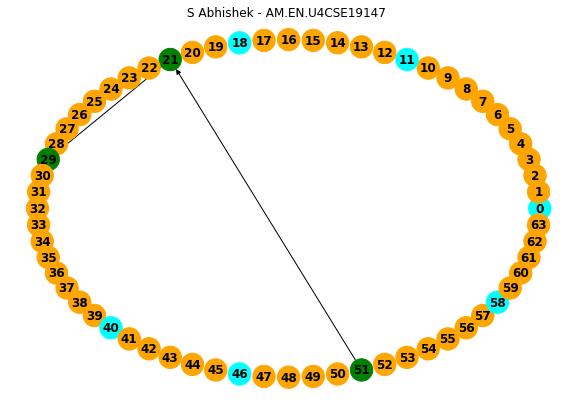

In [5]:
c.look_up(27, 51)

Route : 0 -> 40 -> 11 -> 46 -> 18 -> 51 -> 21 -> 58 -> 0



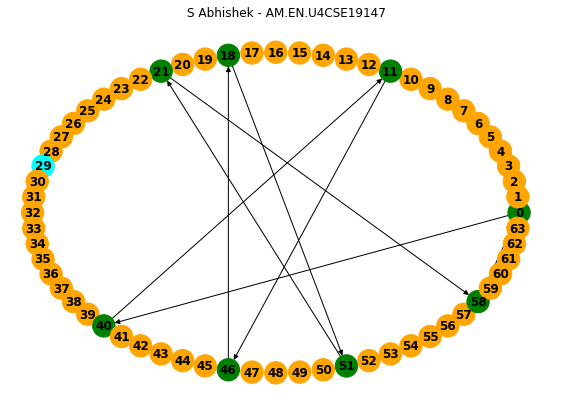

In [6]:
c.look_up(63, 0)

In [7]:
c.remove_node(40)

Nodes in the ring : dict_keys([0, 11, 18, 21, 29, 46, 51, 58])


Route : 11 -> 46 -> 51



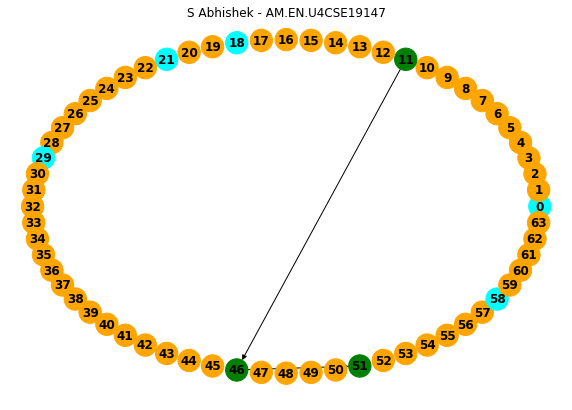

In [8]:
c.look_up(50, 11)

Route : 0 -> 18 -> 21 -> 29



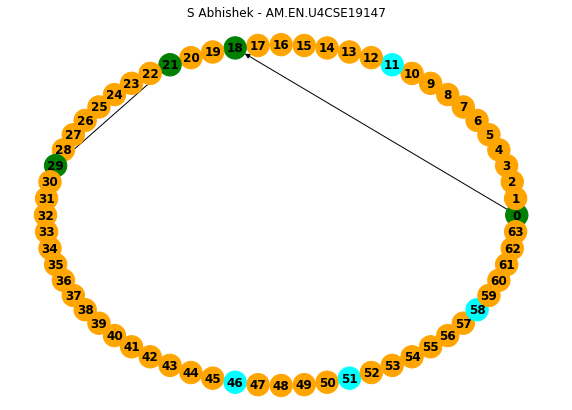

In [9]:
c.look_up(22, 0)

In [10]:
c.remove_node(21)

Nodes in the ring : dict_keys([0, 11, 18, 29, 46, 51, 58])


Route : 0 -> 18 -> 29



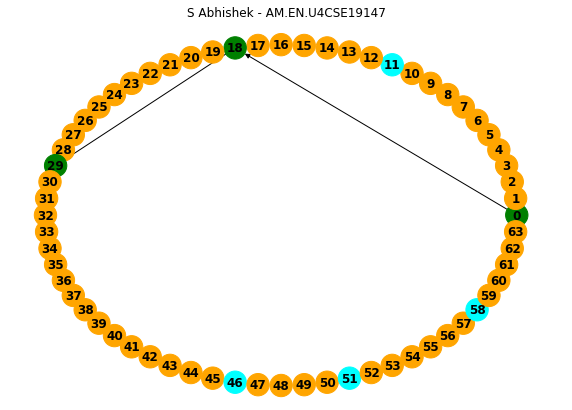

In [11]:
c.look_up(22, 0)